# Weather Forecasting

### Topic : Time Series Analysis

Model used : AutoReg(Autoregressive Model)

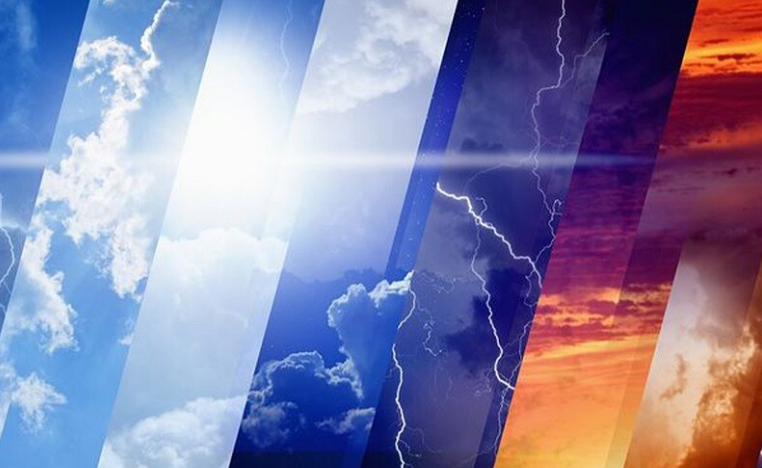

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Reading Data
df_train = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'])
df_test = pd.read_csv("DailyDelhiClimateTest.csv", parse_dates=['date'])

# Data Exploration

In [3]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df_train.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [4]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
df_test.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


Training data is from (2013-01-01 to 2017-01-01)

Testing data is from (2017-01-01 to 2017-04-24)

# Statiscical Overview

In [10]:
df_train.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,1462,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.495521,60.771702,6.802209,1011.104548
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667
25%,2014-01-01 06:00:00,18.857143,50.375000,3.475000,1001.580357
50%,2015-01-01 12:00:00,27.714286,62.625000,6.221667,1008.563492
75%,2016-01-01 18:00:00,31.305804,72.218750,9.238235,1014.944901
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333
std,NaN,7.348103,16.769652,4.561602,180.231668


In [11]:
df_test.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,114,114.000000,114.000000,114.000000,114.000000
mean,2017-02-26 12:00:00,21.713079,56.258362,8.143924,1004.035090
min,2017-01-01 00:00:00,11.000000,17.750000,1.387500,59.000000
25%,2017-01-29 06:00:00,16.437198,39.625000,5.563542,1007.437500
50%,2017-02-26 12:00:00,19.875000,57.750000,8.069444,1012.739316
75%,2017-03-26 18:00:00,27.705357,71.902778,10.068750,1016.739583
max,2017-04-24 00:00:00,34.500000,95.833333,19.314286,1022.809524
std,NaN,6.360072,19.068083,3.588049,89.474692


In [12]:
# Details 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [13]:
# Row-Column
df_train.shape

(1462, 5)

In [14]:
df_test.shape

(114, 5)

### Setting date col as an index

In [15]:
date_train=df_train['date']
date_test=df_test['date']

In [16]:
df_train = df_train.set_index('date')
df_test=df_test.set_index('date')

In [17]:
df_train.sample()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2014-02-28,15.625,88.375,5.8,1013.125


### Getting Year ,Month ,Day name from the date

In [18]:
df_train['year'] = df_train.index.year
df_train['month'] = df_train.index.month
df_train['day_name'] = df_train.index.strftime('%A')
df_train

,meantemp,humidity,wind_speed,meanpressure,year,month,day_name
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,Tuesday
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,Wednesday
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,Thursday
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,Friday
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,Saturday
...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12,Wednesday
2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12,Thursday
2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12,Friday


In [19]:
df_test['year'] = df_test.index.year
df_test['month'] = df_test.index.month
df_test['day_name'] = df_test.index.strftime('%A')
df_test

,meantemp,humidity,wind_speed,meanpressure,year,month,day_name
date,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1,Sunday
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1,Monday
2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1,Tuesday
2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1,Wednesday
2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1,Thursday
...,...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,2017,4,Thursday
2017-04-21,34.250000,39.375000,6.962500,999.875000,2017,4,Friday
2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017,4,Saturday


# Filtering Data

In [20]:
#Data for year 2015
df_train.loc['2015']

,meantemp,humidity,wind_speed,meanpressure,year,month,day_name
date,,,,,,,
2015-01-01,14.750,72.000,0.9250,1017.500,2015,1,Thursday
2015-01-02,14.875,96.625,3.0125,1017.875,2015,1,Friday
2015-01-03,15.125,92.000,0.9250,1017.375,2015,1,Saturday
2015-01-04,14.125,78.750,9.5125,1019.625,2015,1,Sunday
2015-01-05,14.000,69.375,15.0500,1016.000,2015,1,Monday
...,...,...,...,...,...,...,...
2015-12-27,15.375,63.250,7.8875,1020.625,2015,12,Sunday
2015-12-28,17.125,58.125,10.8875,1020.875,2015,12,Monday
2015-12-29,16.375,65.000,7.4125,1018.125,2015,12,Tuesday


In [21]:
# data for a range
#e.g from ('2014-01-01'to '2014-02-01')
df_train.loc['2014-01-01':'2014-02-01']

,meantemp,humidity,wind_speed,meanpressure,year,month,day_name
date,,,,,,,
2014-01-01,13.375000,89.625000,7.650000,1021.000000,2014,1,Wednesday
2014-01-02,11.000000,78.375000,8.100000,1020.250000,2014,1,Thursday
2014-01-03,12.500000,74.875000,5.325000,1017.750000,2014,1,Friday
2014-01-04,12.875000,88.125000,1.162500,1016.250000,2014,1,Saturday
2014-01-05,12.375000,89.000000,0.462500,1014.500000,2014,1,Sunday
2014-01-06,11.428571,86.285714,27.337500,1017.625000,2014,1,Monday
2014-01-07,12.142857,72.285714,20.600000,1017.750000,2014,1,Tuesday
2014-01-08,11.875000,76.875000,1.850000,1017.875000,2014,1,Wednesday
2014-01-09,12.833333,83.000000,1.233333,1017.000000,2014,1,Thursday


# Plotting Time Series Data

In [23]:
# Mean Temperature
fig_temp = go.Figure()
fig_temp.add_trace(go.Scatter(x=df_train.index, y=df_train['meantemp'], mode='lines'))
fig_temp.update_layout(title="Mean Temperature", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5)
fig_temp.show()

In [24]:
# Humidity
fig_humidity = go.Figure()
fig_humidity.add_trace(go.Scatter(x=df_train.index, y=df_train['humidity'], mode='lines'))
fig_humidity.update_layout(title="Humidity", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5)
fig_humidity.show()

In [25]:
# Wind Speed
fig_wind = go.Figure()
fig_wind.add_trace(go.Scatter(x=df_train.index, y=df_train['wind_speed'], mode='lines'))
fig_wind.update_layout(title="Wind Speed", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5)
fig_wind.show()

In [26]:
# Mean Pressure
fig_pressure = go.Figure()
fig_pressure.add_trace(go.Scatter(x=df_train.index, y=df_train['meanpressure'], mode='lines'))
fig_pressure.update_layout(title="Mean Pressure", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5)
fig_pressure.show()

# 2013 Vs 2016

In [28]:
# Mean Temperature for 2013
fig_temp_2013 = go.Figure()
fig_temp_2013.add_trace(go.Scatter(x=df_train.loc['2013', :].index, 
                                   y=df_train.loc['2013', 'meantemp'], 
                                   mode='lines',
                                   line=dict(color='blue')))  
fig_temp_2013.update_layout(title="Mean Temperature (2013)", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5, height=380)  
fig_temp_2013.show()

# Mean Temperature for 2016
fig_temp_2016 = go.Figure()
fig_temp_2016.add_trace(go.Scatter(x=df_train.loc['2016', :].index, 
                                   y=df_train.loc['2016', 'meantemp'], 
                                   mode='lines',
                                   line=dict(color='blue'))) 
fig_temp_2016.update_layout(title="Mean Temperature (2016)", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5, height=380)  
fig_temp_2016.show()

In [29]:
# Humidity for 2013
fig_humidity_2013 = go.Figure()
fig_humidity_2013.add_trace(go.Scatter(x=df_train.loc['2013', :].index, 
                                       y=df_train.loc['2013', 'humidity'], 
                                       mode='lines',
                                       line=dict(color='green'))) 
fig_humidity_2013.update_layout(title="Humidity (2013)", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5, height=380)  
fig_humidity_2013.show()

# Humidity for 2016
fig_humidity_2016 = go.Figure()
fig_humidity_2016.add_trace(go.Scatter(x=df_train.loc['2016', :].index, 
                                       y=df_train.loc['2016', 'humidity'], 
                                       mode='lines',
                                       line=dict(color='green')))  
fig_humidity_2016.update_layout(title="Humidity (2016)", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5, height=380)
fig_humidity_2016.show()

In [30]:
# Plotting Wind Speed for 2013
fig_wind_2013 = go.Figure()
fig_wind_2013.add_trace(go.Scatter(x=df_train.loc['2013', :].index, 
                                   y=df_train.loc['2013', 'wind_speed'], 
                                   mode='lines',
                                   line=dict(color='red')))  
fig_wind_2013.update_layout(title="Wind Speed (2013)", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5, height=380)  
fig_wind_2013.show()

# Wind Speed for 2016
fig_wind_2016 = go.Figure()
fig_wind_2016.add_trace(go.Scatter(x=df_train.loc['2016', :].index, 
                                   y=df_train.loc['2016', 'wind_speed'], 
                                   mode='lines',
                                   line=dict(color='red')))  
fig_wind_2016.update_layout(title="Wind Speed (2016)", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5, height=380)  
fig_wind_2016.show()

In [32]:
#Mean Pressure for 2013
fig_pressure_2013 = go.Figure()
fig_pressure_2013.add_trace(go.Scatter(x=df_train.loc['2013', :].index, 
                                       y=df_train.loc['2013', 'meanpressure'], 
                                       mode='lines',
                                       line=dict(color='purple')))  
fig_pressure_2013.update_layout(title="Mean Pressure (2013)", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5, height=380)  
fig_pressure_2013.show()

# Mean Pressure for 2016
fig_pressure_2016 = go.Figure()
fig_pressure_2016.add_trace(go.Scatter(x=df_train.loc['2016', :].index, 
                                       y=df_train.loc['2016', 'meanpressure'], 
                                       mode='lines',
                                       line=dict(color='purple')))  
fig_pressure_2016.update_layout(title="Mean Pressure (2016)", xaxis_title="Date", yaxis_title="Value", template='plotly_white', title_x=0.5, height=380)

# Data Cleaning and Preprocessing

In [33]:
#Dropping Non-numerical column
df_train_Numerical = df_train.drop(columns=['day_name'])
df_test_Numerical = df_test.drop(columns=['day_name'])

In [34]:
df_train_Numerical.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month'], dtype='object')

In [35]:
df_test_Numerical.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month'], dtype='object')

# Normalizing the Data

In [36]:
scl = StandardScaler()
df_train_scl = scl.fit_transform(df_train_Numerical)
df_test_scl = scl.transform(df_test_Numerical)

In [37]:
print(df_train_scl)

[[-2.10950001  1.41543887 -1.49169876  0.02532119 -1.34189091 -1.599501  ]
 [-2.46345392  1.86282836 -0.83819598  0.03716186 -1.34189091 -1.599501  ]
 [-2.49521901  1.5645687  -0.47562621  0.04197213 -1.34189091 -1.599501  ]
 ...
 [-1.5519902   1.72364052 -0.11744236  0.03774332  1.33700464  1.58840024]
 [-1.42165437  1.5645687   0.11464615  0.02772632  1.33700464  1.58840024]
 [-2.10950001  2.34004383 -1.49169876  0.02717129  2.22996982 -1.599501  ]]


In [38]:
print(df_test_scl)

[[-1.30452123e+00  1.49713608e+00 -8.90064308e-01 -5.28447825e+00
   2.22996982e+00 -1.59950100e+00]
 [-9.52343019e-01  9.81305354e-01 -8.56957993e-01  3.98136728e-02
   2.22996982e+00 -1.59950100e+00]
 [-1.14142096e+00  1.25968104e+00 -6.10858886e-01  4.01220235e-02
   2.22996982e+00 -1.59950100e+00]
 [-9.25115795e-01  5.53468435e-01 -4.94997376e-01  2.55061993e-02
   2.22996982e+00 -1.59950100e+00]
 [-9.67469254e-01  8.45431507e-01 -7.68021187e-01  1.79207715e-02
   2.22996982e+00 -1.59950100e+00]
 [-8.40958923e-01  1.10633340e+00  4.12191269e-01  3.70860636e-03
   2.22996982e+00 -1.59950100e+00]
 [-1.46852580e+00  2.09149411e+00  7.10400920e-01  1.50109551e-03
   2.22996982e+00 -1.59950100e+00]
 [-1.33567366e+00  1.35735672e+00 -1.06407110e+00  2.46736523e-02
   2.22996982e+00 -1.59950100e+00]
 [-1.48716348e+00  1.19529483e+00 -5.68748300e-02  2.69069925e-02
   2.22996982e+00 -1.59950100e+00]
 [-1.82210154e+00  6.66475708e-01  5.61157650e-01  3.21049047e-02
   2.22996982e+00 -1.5995

In [39]:
type(df_train_scl)

numpy.ndarray

In [40]:
# Converting noramlized data from numpy to dataframe
df_train_scl=pd.DataFrame(df_train_scl)
df_train_scl

,0,1,2,3,4,5
0,-2.109500,1.415439,-1.491699,0.025321,-1.341891,-1.599501
1,-2.463454,1.862828,-0.838196,0.037162,-1.341891,-1.599501
2,-2.495219,1.564569,-0.475626,0.041972,-1.341891,-1.599501
3,-2.291015,0.630022,-1.221233,0.033647,-1.341891,-1.599501
4,-2.654044,1.554627,-0.680303,0.029946,-1.341891,-1.599501
...,...,...,...,...,...,...
1457,-1.126952,0.433776,-0.713674,0.024758,1.337005,1.588400
1458,-1.396406,1.615699,-0.175921,0.032193,1.337005,1.588400
1459,-1.551990,1.723641,-0.117442,0.037743,1.337005,1.588400
1460,-1.421654,1.564569,0.114646,0.027726,1.337005,1.588400


In [41]:
df_test_scl=pd.DataFrame(df_test_scl)
df_test_scl

,0,1,2,3,4,5
0,-1.304521,1.497136,-0.890064,-5.284478,2.22997,-1.599501
1,-0.952343,0.981305,-0.856958,0.039814,2.22997,-1.599501
2,-1.141421,1.259681,-0.610859,0.040122,2.22997,-1.599501
3,-0.925116,0.553468,-0.494997,0.025506,2.22997,-1.599501
4,-0.967469,0.845432,-0.768021,0.017921,2.22997,-1.599501
...,...,...,...,...,...,...
109,1.225835,-1.984721,-0.271863,-0.069265,2.22997,-0.730073
110,1.191801,-1.276355,0.035151,-0.062328,2.22997,-0.730073
111,1.008017,-1.185385,0.457845,-0.052753,2.22997,-0.730073
112,1.004614,-1.984721,0.693040,-0.049839,2.22997,-0.730073


# Rename columns

In [42]:
df_train_scl.rename(columns={0: 'meantemp', 1: 'humidity',2:'wind_speed',3:'meanpressure',4:'year',5:'month'}, inplace=True)
df_train_scl

,meantemp,humidity,wind_speed,meanpressure,year,month
0,-2.109500,1.415439,-1.491699,0.025321,-1.341891,-1.599501
1,-2.463454,1.862828,-0.838196,0.037162,-1.341891,-1.599501
2,-2.495219,1.564569,-0.475626,0.041972,-1.341891,-1.599501
3,-2.291015,0.630022,-1.221233,0.033647,-1.341891,-1.599501
4,-2.654044,1.554627,-0.680303,0.029946,-1.341891,-1.599501
...,...,...,...,...,...,...
1457,-1.126952,0.433776,-0.713674,0.024758,1.337005,1.588400
1458,-1.396406,1.615699,-0.175921,0.032193,1.337005,1.588400
1459,-1.551990,1.723641,-0.117442,0.037743,1.337005,1.588400
1460,-1.421654,1.564569,0.114646,0.027726,1.337005,1.588400


In [43]:
df_test_scl.rename(columns={0: 'meantemp', 1: 'humidity',2:'wind_speed',3:'meanpressure',4:'year',5:'month'}, inplace=True)
df_test_scl

,meantemp,humidity,wind_speed,meanpressure,year,month
0,-1.304521,1.497136,-0.890064,-5.284478,2.22997,-1.599501
1,-0.952343,0.981305,-0.856958,0.039814,2.22997,-1.599501
2,-1.141421,1.259681,-0.610859,0.040122,2.22997,-1.599501
3,-0.925116,0.553468,-0.494997,0.025506,2.22997,-1.599501
4,-0.967469,0.845432,-0.768021,0.017921,2.22997,-1.599501
...,...,...,...,...,...,...
109,1.225835,-1.984721,-0.271863,-0.069265,2.22997,-0.730073
110,1.191801,-1.276355,0.035151,-0.062328,2.22997,-0.730073
111,1.008017,-1.185385,0.457845,-0.052753,2.22997,-0.730073
112,1.004614,-1.984721,0.693040,-0.049839,2.22997,-0.730073


Adding date as a column to df then make it as index

In [44]:
df_date_train = pd.DataFrame({'date_train': date_train}) #to df
df_train_scl = pd.concat([df_train_scl, df_date_train], axis=1)#concat
print(df_train_scl.columns)

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month',
       'date_train'],
      dtype='object')


In [46]:
df_train_scl.set_index('date_train', inplace=True)
print(df_train_scl)

            meantemp  humidity  wind_speed  meanpressure      year     month
date_train                                                                  
2013-01-01 -2.109500  1.415439   -1.491699      0.025321 -1.341891 -1.599501
2013-01-02 -2.463454  1.862828   -0.838196      0.037162 -1.341891 -1.599501
2013-01-03 -2.495219  1.564569   -0.475626      0.041972 -1.341891 -1.599501
2013-01-04 -2.291015  0.630022   -1.221233      0.033647 -1.341891 -1.599501
2013-01-05 -2.654044  1.554627   -0.680303      0.029946 -1.341891 -1.599501
...              ...       ...         ...           ...       ...       ...
2016-12-28 -1.126952  0.433776   -0.713674      0.024758  1.337005  1.588400
2016-12-29 -1.396406  1.615699   -0.175921      0.032193  1.337005  1.588400
2016-12-30 -1.551990  1.723641   -0.117442      0.037743  1.337005  1.588400
2016-12-31 -1.421654  1.564569    0.114646      0.027726  1.337005  1.588400
2017-01-01 -2.109500  2.340044   -1.491699      0.027171  2.229970 -1.599501

In [47]:
df_date_test = pd.DataFrame({'date_test': date_test})
df_test_scl = pd.concat([df_test_scl, df_date_test], axis=1)
print(df_test_scl.columns)

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month',
       'date_test'],
      dtype='object')


In [48]:
df_test_scl.set_index('date_test', inplace=True)
print(df_test_scl)

            meantemp  humidity  wind_speed  meanpressure     year     month
date_test                                                                  
2017-01-01 -1.304521  1.497136   -0.890064     -5.284478  2.22997 -1.599501
2017-01-02 -0.952343  0.981305   -0.856958      0.039814  2.22997 -1.599501
2017-01-03 -1.141421  1.259681   -0.610859      0.040122  2.22997 -1.599501
2017-01-04 -0.925116  0.553468   -0.494997      0.025506  2.22997 -1.599501
2017-01-05 -0.967469  0.845432   -0.768021      0.017921  2.22997 -1.599501
...              ...       ...         ...           ...      ...       ...
2017-04-20  1.225835 -1.984721   -0.271863     -0.069265  2.22997 -0.730073
2017-04-21  1.191801 -1.276355    0.035151     -0.062328  2.22997 -0.730073
2017-04-22  1.008017 -1.185385    0.457845     -0.052753  2.22997 -0.730073
2017-04-23  1.004614 -1.984721    0.693040     -0.049839  2.22997 -0.730073
2017-04-24  0.885495 -2.006026    1.174317     -0.038640  2.22997 -0.730073

[114 rows x

# Implementing AutoReg Model

### Objective: (Predict wind speed)

In [49]:
wind_train = df_train_scl['wind_speed']
wind_test = df_test_scl['wind_speed']

# Training the model

In [53]:
lag_order = 180
ar_model_wind = AutoReg(wind_train, lags=lag_order)
model_fit = ar_model_wind.fit()

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



# Make Predictions

In [54]:
predictions = model_fit.predict(start=len(wind_train), end=len(wind_train)+len(wind_test)-1, dynamic=False)

D:\Anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



# Evaluating the model

In [55]:
mse_wind = mean_squared_error(wind_test, predictions)
print(f'Mean Squared Error: {mse_wind:.5f}')

Mean Squared Error: 0.79548


In [56]:
mae_wind = mean_absolute_error(wind_test, predictions)
print(f'Mean Absolute Error: {mae_wind:.5f}')

Mean Absolute Error: 0.69607


In [57]:
rmse_wind = mean_squared_error(wind_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse_wind:.5f}')

Root Mean Squared Error: 0.89190


In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=wind_test.index, y=wind_test, mode='lines+markers', name='Actual'))
fig.add_trace(go.Scatter(x=wind_test.index, y=predictions, mode='lines+markers', name='Predicted'))

fig.update_layout(title='AR Model Forecasting',
                  xaxis_title='Date',
                  yaxis_title='Wind Speed',
                  legend=dict(orientation='h', yanchor='top', y=1.1, xanchor='right', x=1),
                  margin=dict(l=50, r=50, t=80, b=50),
                  template='plotly_white',
                  title_x=0.5) 

# Decrease the size of markers
fig.update_traces(marker=dict(size=4))

fig.show()

In [59]:
print(wind_test)

date_test
2017-01-01   -0.890064
2017-01-02   -0.856958
2017-01-03   -0.610859
2017-01-04   -0.494997
2017-01-05   -0.768021
                ...   
2017-04-20   -0.271863
2017-04-21    0.035151
2017-04-22    0.457845
2017-04-23    0.693040
2017-04-24    1.174317
Name: wind_speed, Length: 114, dtype: float64


In [60]:
print(predictions)

2017-01-02   -0.701832
2017-01-03   -0.189319
2017-01-04   -0.523228
2017-01-05   -0.448629
2017-01-06   -0.408211
                ...   
2017-04-21   -0.009940
2017-04-22    0.256467
2017-04-23    0.224150
2017-04-24    0.318700
2017-04-25    0.253277
Freq: D, Length: 114, dtype: float64
